   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude   
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88  \
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Numerical features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


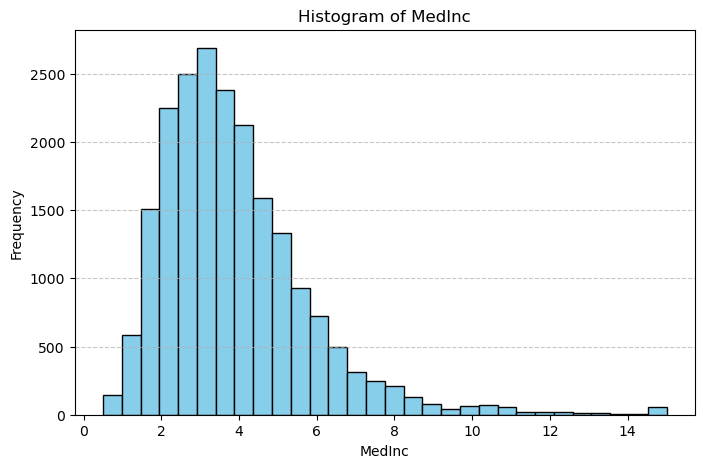

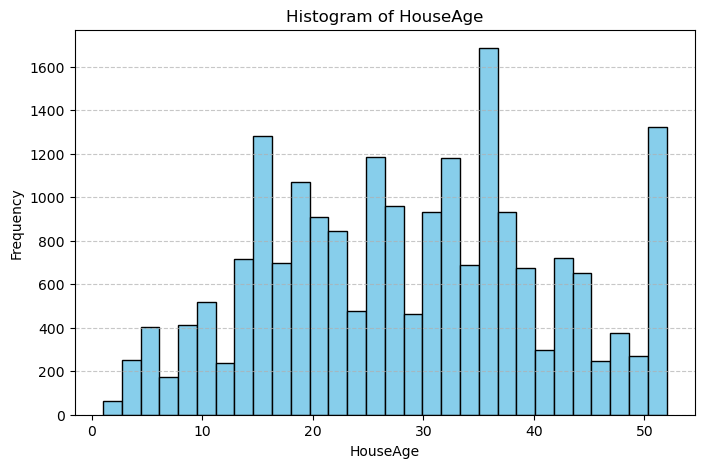

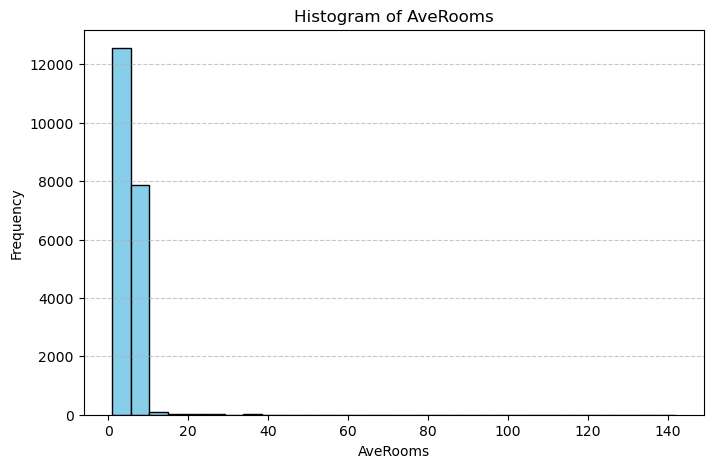

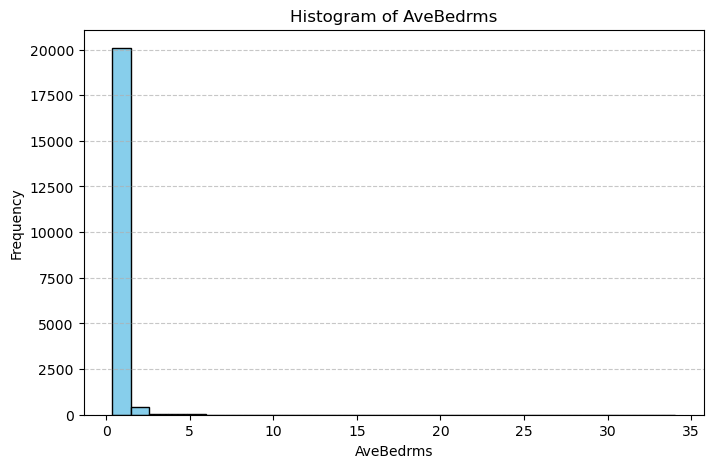

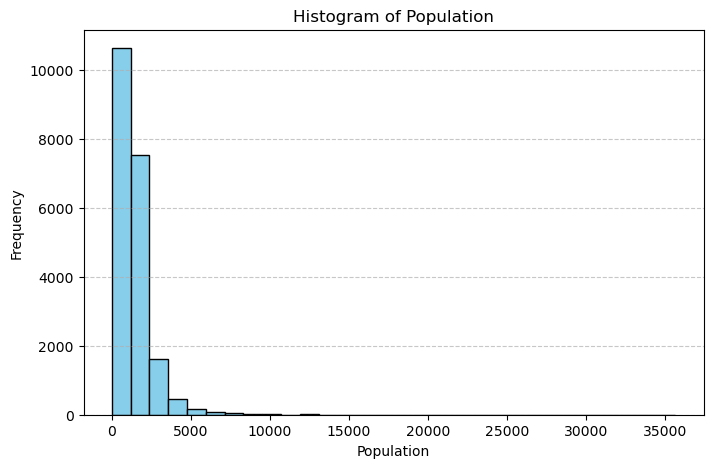

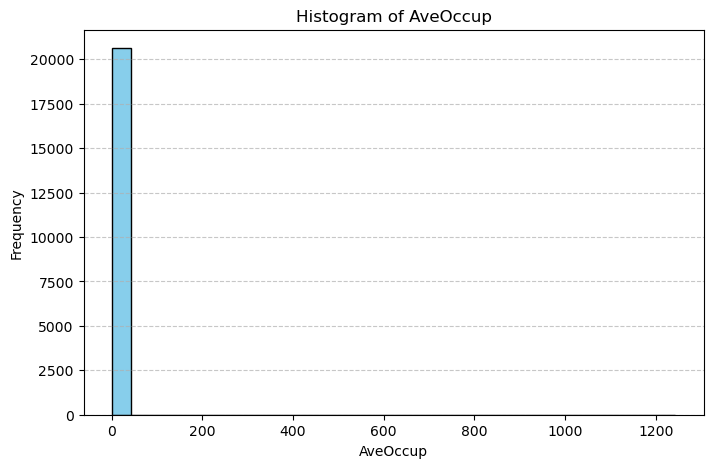

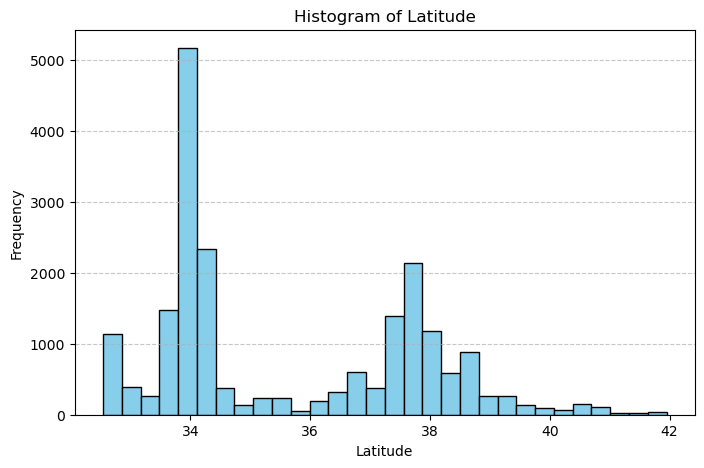

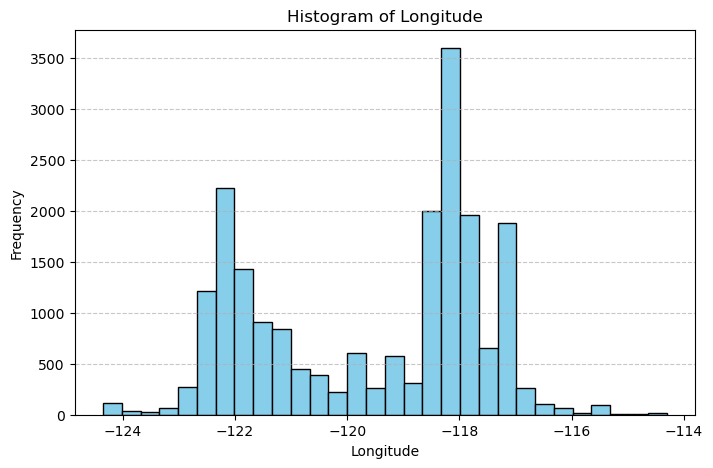

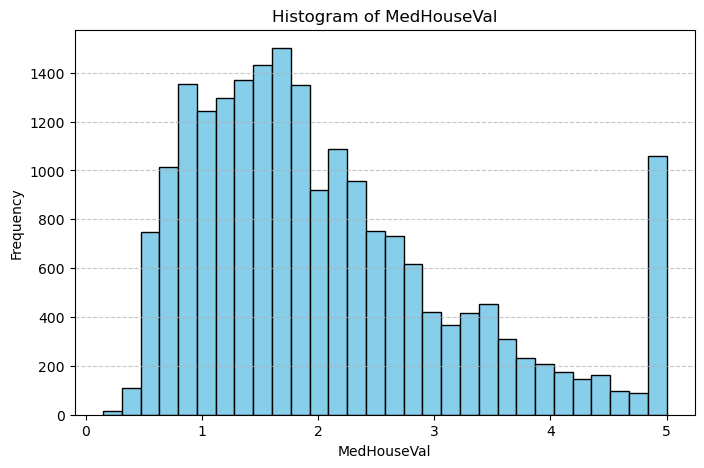

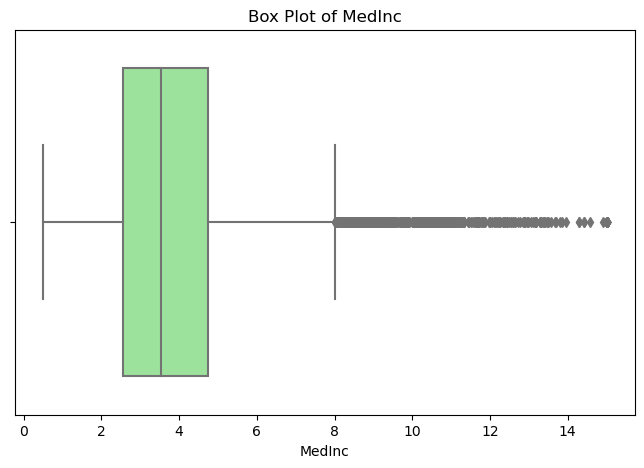

Outliers in MedInc:
9019      8.0137
9026      8.0144
18088     8.0158
5355      8.0239
8877      8.0257
          ...   
1566     15.0001
6736     15.0001
6727     15.0001
8853     15.0001
17858    15.0001
Name: MedInc, Length: 681, dtype: float64


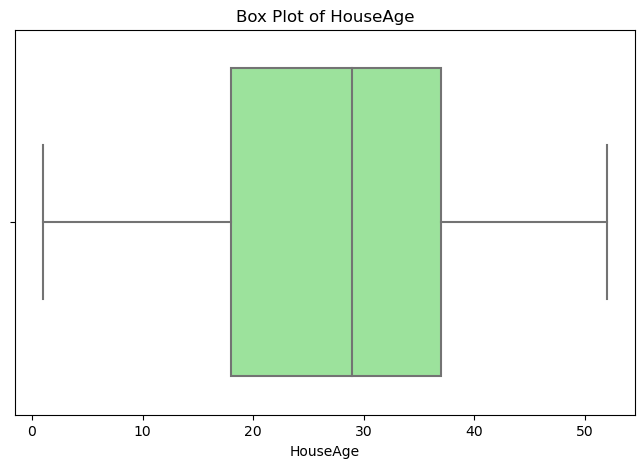

Outliers in HouseAge:
Series([], Name: HouseAge, dtype: float64)


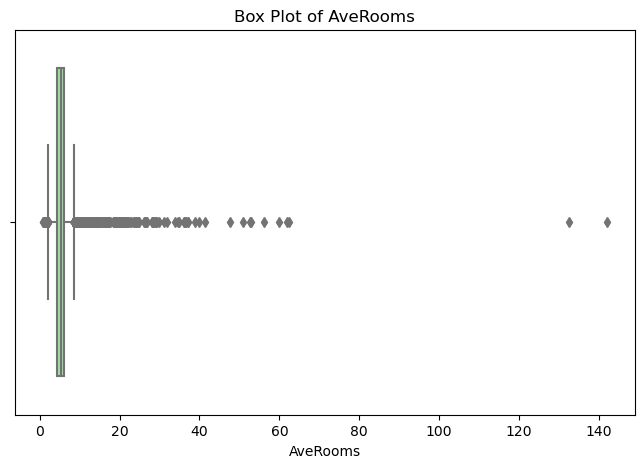

Outliers in AveRooms:
5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: AveRooms, Length: 511, dtype: float64


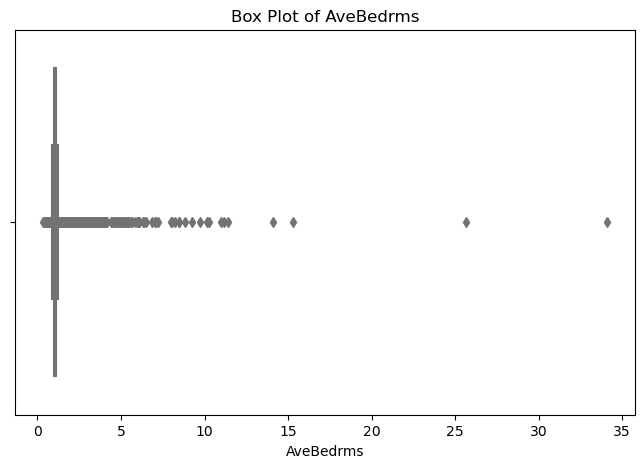

Outliers in AveBedrms:
20248     0.333333
13606     0.375000
12649     0.444444
12138     0.500000
3125      0.500000
           ...    
9676     11.410714
12447    14.111111
11862    15.312500
1914     25.636364
1979     34.066667
Name: AveBedrms, Length: 1424, dtype: float64


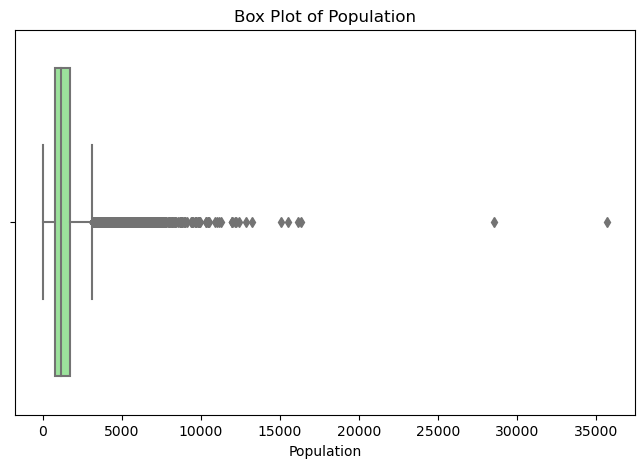

Outliers in Population:
12454     3134.0
3419      3134.0
15883     3134.0
5329      3136.0
12231     3136.0
          ...   
6057     15507.0
10309    16122.0
13139    16305.0
9880     28566.0
15360    35682.0
Name: Population, Length: 1196, dtype: float64


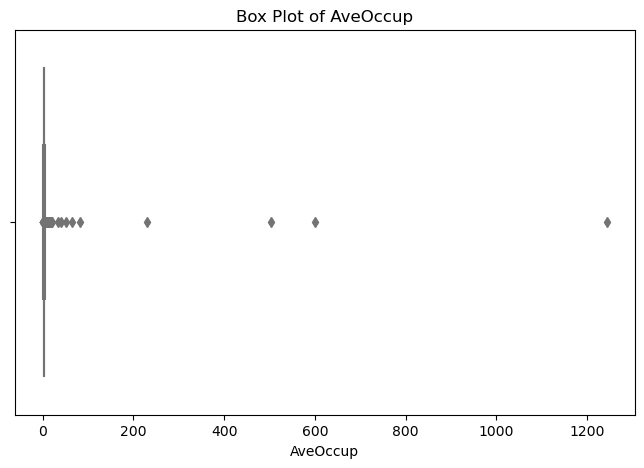

Outliers in AveOccup:
11849       0.692308
5342        0.750000
19522       0.970588
19427       1.060606
4623        1.066176
            ...     
9172       83.171429
13034     230.172414
16669     502.461538
3364      599.714286
19006    1243.333333
Name: AveOccup, Length: 711, dtype: float64


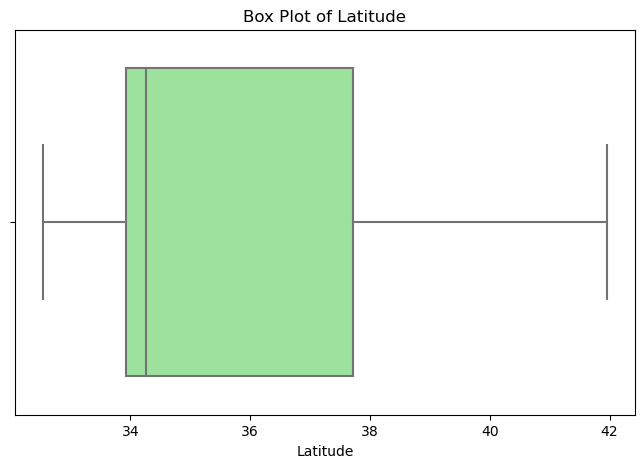

Outliers in Latitude:
Series([], Name: Latitude, dtype: float64)


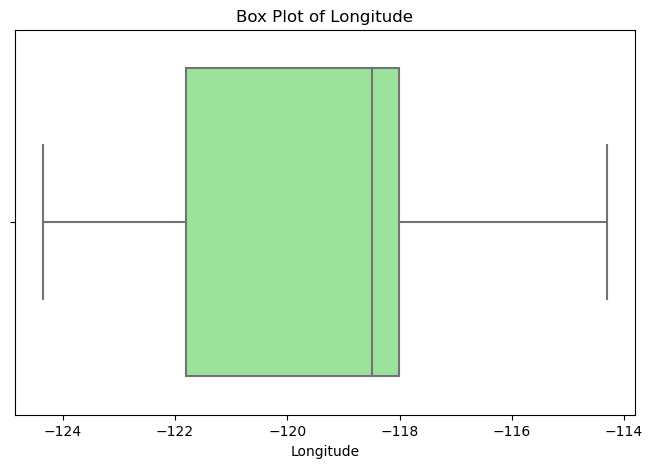

Outliers in Longitude:
Series([], Name: Longitude, dtype: float64)


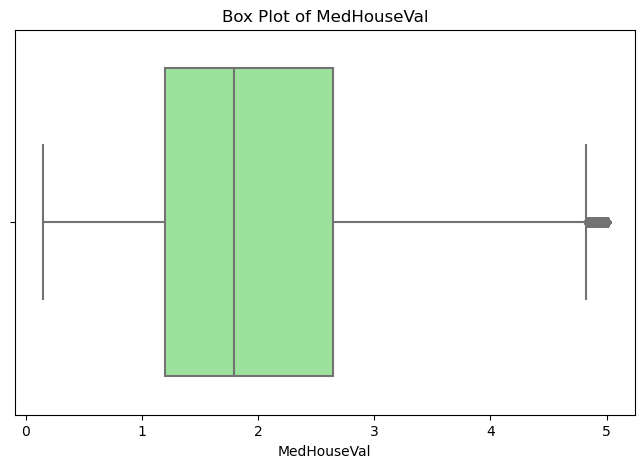

Outliers in MedHouseVal:
14817    4.82700
10734    4.82900
4018     4.83100
140      4.83300
10405    4.83300
          ...   
8761     5.00001
8764     5.00001
8766     5.00001
8638     5.00001
20443    5.00001
Name: MedHouseVal, Length: 1071, dtype: float64


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the California Housing dataset
from sklearn.datasets import fetch_california_housing

# Fetch data
"""Imports the California Housing dataset, which contains housing data for different regions in
California."""
housing_data = fetch_california_housing(as_frame=True)  
data = housing_data.frame

# Display the first few rows of the dataset
print(data.head())

# Check for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical features: {list(numerical_features)}")

# Histograms for all numerical features
"""Loops through each numerical feature and plots a histogram:

    Bins = 30: Divides the data range into 30 intervals.
    Color = 'skyblue': Sets the bar color.
    Edge color = 'black': Highlights bar edges for better visibility.
    Grid lines improve readability."""
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Box plots for all numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[feature], color='lightgreen')
    plt.title(f"Box Plot of {feature}")
    plt.xlabel(feature)
    plt.show()

    # Identify outliers using IQR (Interquartile Range)
    """Q1 (25th percentile): The first quartile (lower boundary of the middle 50% of data).
    Q3 (75th percentile): The third quartile (upper boundary of the middle 50% of data).
    IQR (Interquartile Range): Measures the spread of the middle 50% of data.
    Lower & Upper Bounds: Defines the range of typical values. Any value outside this range is an 
    outlier."""
    Q1 = data[feature].quantile(0.25)  # 25th percentile
    Q3 = data[feature].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    
    print(f"Outliers in {feature}:")
    print(outliers[feature].sort_values())
